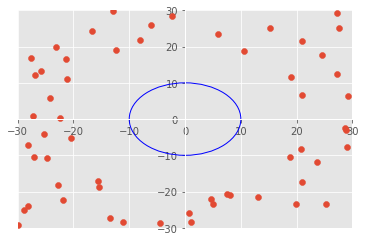

In [1]:
#%%

from typing import NamedTuple, List
import random
from random import uniform
import matplotlib.pyplot as plt
import math

# 2D world/earth surface
# one "world coordinate frame", origin (0, 0), x-axis to the right, y-axis up

Meter = float
Radian = float

class Point(NamedTuple):
    x: Meter
    y: Meter
    
    
class Circle(NamedTuple):
    p: Point
    r: Meter

# world bounding box
class BoundingBox(NamedTuple):
    lower_left: Point
    upper_right: Point

world_bb = BoundingBox(lower_left=Point(-10,-10),
                       upper_right=Point(10, 10))

earth = Circle(Point(0.0, 0.0), 10)


# camera point directly away from 2D earth

class Camera(NamedTuple):
   """
   Assume camera is pointing directly away from earth, so the camera
   pose is representing by one number, it's position on the surface of 
   the earth.  position == angle in [-pi, pi)
   maybe use [0, 2pi]?
   """
   angle: float


def cam_xy(cam: Camera) -> Point:
    pass

# random star field

Stars = List[Point]

n_stars = 100

'''
random_xs = [uniform(world_bb.lower_left.x, world_bb.upper_right.x)
             for _ in range(n_stars)]
random_ys = [uniform(world_bb.lower_left.y, world_bb.upper_right.y)
             for _ in range(n_stars)]
'''

#temp solution
random_xs = [uniform(0,30.0) for _ in range(50)] + [uniform(0, -30.0) for _ in range(50)]

random_ys = [uniform(0,30.0) for _ in range(50)] + [uniform(0,-30.0) for _ in range(50)]

random.shuffle(random_xs); random.shuffle(random_xs)

def distance_point_circle(p: Point, c: Circle) -> Meter:
    # d = distance between p and center of circle
    d = math.sqrt((p.x - c.p.x) ** 2 + (p.y - c.p.y) ** 2)
    d -= c.r
    return d
    
def in_earth(p: Point, earth: Circle) -> bool:
    # distance from point to circle is less than or equal to the radius of the earth
    # .     (      .      )
    margin = 1.0
    return distance_point_circle(p, earth) <= earth.r + margin
    

stars = [Point(x, y) for x, y in zip(random_xs, random_ys)
         if not in_earth(Point(x, y), earth)]

x = [i.x for i in stars]
y = [i.y for i in stars]

# draw earth and stars and camera
circle1 = plt.Circle((earth.p.x, earth.p.y), earth.r , color='b',fill=False)

#Configuring settings to center the circle onto the origin and zoom out
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

lims = (-30,30)
plt.xlim(lims)
plt.ylim(lims)

ax.add_artist(circle1)
plt.scatter(x,y)
plt.plot()
plt.show()
# simulated image

# star map

# cross correlation image matching to known map



In [2]:
#%%

from typing import NamedTuple, List
import random
from random import uniform
import matplotlib.pyplot as plt
import math

# 2D world/earth surface
# one "world coordinate frame", origin (0, 0), x-axis to the right, y-axis up

Meter = float
Radian = float

class Point(NamedTuple):
    x: Meter
    y: Meter
    
class Circle(NamedTuple):
    p: Point
    r: Meter #radius

class Circle(NamedTuple):
    p: Point #center
    r: Meter #radius
# camera point directly away from 2D earth

class Camera(NamedTuple):
   """
   Assume camera is pointing directly away from earth, so the camera
   pose is representing by one number, it's position on the surface of 
   the earth.  position == angle in [-pi, pi)
   maybe use [0, 2pi]?
   """
   angle: float

Here, `generate_starfield` takes a `margin` that makes sure stars are not inside of the earth by a fixed `margin`. `generate_starfield` also takes `limit` to measure the boundaries of the outmost universe.

In [3]:
"""
def cam_xy(cam: Camera) -> Point:
    pass
"""

def distance_point_circle(p: Point, earth: Circle) -> Meter:
    # d = distance between p and center of circle
    d = math.sqrt((p.x - earth.p.x) ** 2 + (p.y - earth.p.y) ** 2)
    return d #returns distance

def out_earth(margin,p:Point, earth:Circle) -> bool:
    # distance from point to circle is less than or equal to the radius of the earth
    # .     (      .      )
    #margin = 1.0
    return distance_point_circle(p, earth) >= earth.r + margin

def in_earth(margin,p:Point, earth:Circle) -> bool:
    # distance from point to circle is less than or equal to the radius of the earth
    # .     (      .      )
    #margin = 1.0
    return distance_point_circle(p, earth) + margin <= earth.r 
# random star field
"""
arguments: n_stars, circle struct to pull radius from and to get boundaries, margin, and universe size
"""
def generate_starfield(margin,earth:Circle,limits:Point,n_stars=100):
  y = []
  x = []
  counter = 0
  while (counter < n_stars):
    random_xs = uniform(-1*limits.x,limits.x)
    random_ys = uniform(-1*limits.y,limits.y)
    k =  out_earth(margin,Point(random_xs,random_ys), earth )
    #print("Are the stars outside of Earth and the margin?" , k)
    if (k == True):
      y.append(random_ys)
      x.append(random_xs)
      counter +=1
    else:
      counter +=0
  
  return y, x

def generate_camera(margin, earth:Circle):
  x = True
  while (x == True):
    random_x = uniform(-1*earth.r,earth.r)
    random_y = uniform(-1*earth.r,earth.r)

    k = in_earth(margin,Point(random_x,random_y),earth)
    #print("Is camera within earth and the margin? " ,k)
    if (k == True):
      x = False
  return Point(random_x,random_y)

  

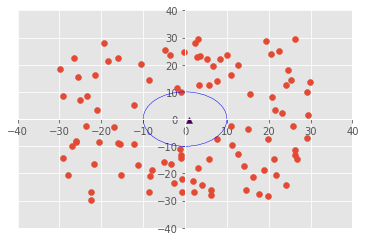

In [4]:
"""
Consider making a function to generate the matplotlib
"""
#int main(){}
def main():
  #creating earth and stars
  earth  = Circle(Point(0.0, 0.0), 10) #default coords should always be zero
  limits = Point(30,30)
  y,x    = generate_starfield(0,earth,limits,100)
  # draw earth and stars and camera
  circle1 = plt.Circle((earth.p.x, earth.p.y), earth.r , color='b',fill=False)
  camera  = generate_camera(5, earth)
  #Configuring settings to center the circle onto the origin and zoom out
  plt.style.use('ggplot')
  fig, ax = plt.subplots()
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  lims = (-40,40)
  plt.xlim(lims)
  plt.ylim(lims)

  ax.add_artist(circle1)
  plt.scatter(x,y)
  plt.scatter(camera.x, camera.y, marker='^', c =2)
  plt.plot()
  plt.show()
  # simulated image

  # star map

  # cross correlation image matching to known map

if __name__ == "__main__":
  main()
